
#II. Các bước tiếp cận bài toán

###Tóm tắt
Hướng phân tích là từ data theo thời gian ⟹ đưa về data với index là 30 cổ phiếu ⟹ Tạo cho mỗi cổ phiếu các thống kê (trung bình theo thời gian, phương sai theo thời gian,...) ⟹ PCA để chọn lọc feature và tiện cho việc trực quan ⟹ Cuối cùng là KMeans để tìm các nhóm cổ phiếu có chung pattern

## Bước 1: Load pickle file

### Thêm thư viện

In [ ]:
import numpy as np
import pandas as pd

### Đọc pickle file

Vì file cho sẵn là 1 list các data frame, ta nối chúng lại bằng method concat() có sẵn
<br> Để chạy được lệnh dưới, cần phải tải file data df_merged.pkl lên google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_pickle('/content/drive/MyDrive/df_merged.pkl')
df = pd.concat(df)

Mounted at /content/drive


In [ ]:
df.head()

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-19 02:15:40+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.0,10.0,0.0,1700.0,310.0,110.0,18345.0,230.0
2023-04-19 02:15:50+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,20.0,0.0,2070.0,0.0,0.0,115.0,18310.0,0.0
2023-04-19 02:16:00+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,800.0,80.0,30.0,3070.0,1650.0,10.0,120.0,18335.0,0.0
2023-04-19 02:16:10+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.0,0.0,4070.0,1650.0,0.0,120.0,18360.0,150.0


## Bước 2: Clean data

Ta nhận thấy:
> 1. Dữ liệu được thể hiện qua gia_mua, gia_ban với kl_mua và kl_ban tương ứng, tuy nhiên với khối lượng giao dịch 2 *(ban_kl_2; mua_kl_2)* thì dữ liệu lại không có giá giao dịch tương ứng -> Bỏ bớt
> 2. Có rất nhiều giá trị 0 ở khối lượng -> không tồn tại giao dịch -> Vô lí -> Ta xem như là missing value và tiến hành xử lí

###  Xóa khối lượng bán 2 và khối lượng mua 2

Dataframe từ (30058, 181) sau khi xóa Kl_ban_2 và Kl_mua_2 sẽ có chiều (30058, 121)

In [ ]:
keys = df.keys()
# Lấy những cột cần giữ lại
remove_keys =  [k for k in keys if 'ban_kl_2' in k or 'mua_kl_2' in k]
keys = [k for k in keys if k not in remove_keys]

# Tạo một dataframe dựa trên những cột đã được chọn
better_df = pd.DataFrame(df[keys][:])
better_df.head()

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,...,ban_kl_1TCB,ban_kl_1TPB,ban_kl_1VCB,ban_kl_1VHM,ban_kl_1VIB,ban_kl_1VIC,ban_kl_1VJC,ban_kl_1VNM,ban_kl_1VPB,ban_kl_1VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2023-04-19 02:15:40+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.000000,30.0,0.0,660.0,10.0,10.000000,9650.0,50.0
2023-04-19 02:15:50+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,25.000000,0.0,3670.0,0.0,0.0,47.500000,9630.0,0.0
2023-04-19 02:16:00+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,10.0,76.666667,105.0,2170.0,1010.0,15.0,340.000000,11047.5,0.0
2023-04-19 02:16:10+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.000000,0.0,2170.0,1035.0,0.0,426.666667,10590.0,415.0


###  Chỉnh lại tên cột

Chỉnh tên cột chứa các kí tự như "_", "1" vì ta không còn quan tâm đến thành phần giao dịch thứ 2 nữa

In [ ]:
for k in keys:
        if 'mua_gia_1' in k:
                keys[keys.index(k)] = k.replace("mua_gia_1", "Gia mua ")
        elif 'ban_gia_1' in k:
                keys[keys.index(k)] = k.replace("ban_gia_1", "Gia ban ")
        elif 'ban_kl_1' in k:
                keys[keys.index(k)] = k.replace("ban_kl_1", "Kl ban ")
        elif 'mua_kl_1' in k:
                keys[keys.index(k)]= k.replace("mua_kl_1", "Kl mua ")
        elif 'time' in k:
                keys[keys.index(k)] = k.replace("_time", "Thoi gian")

# Chỉnh lại tên cột
better_df.columns = keys
better_df.head()

,Gia mua ACB,Gia mua BCM,Gia mua BID,Gia mua BVH,Gia mua CTG,Gia mua FPT,Gia mua GAS,Gia mua GVR,Gia mua HDB,Gia mua HPG,...,Kl ban TCB,Kl ban TPB,Kl ban VCB,Kl ban VHM,Kl ban VIB,Kl ban VIC,Kl ban VJC,Kl ban VNM,Kl ban VPB,Kl ban VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2023-04-19 02:15:40+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.000000,30.0,0.0,660.0,10.0,10.000000,9650.0,50.0
2023-04-19 02:15:50+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,25.000000,0.0,3670.0,0.0,0.0,47.500000,9630.0,0.0
2023-04-19 02:16:00+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,10.0,76.666667,105.0,2170.0,1010.0,15.0,340.000000,11047.5,0.0
2023-04-19 02:16:10+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,0.0,0.0,0.000000,0.0,2170.0,1035.0,0.0,426.666667,10590.0,415.0


### Nội suy các dữ liệu thiếu

 Chỉnh 0.0 về (NaN) để python nhận biết null value
<br>- Nội suy những giá trị NaN này bằng cách lấy **trung bình của 2 phần tử xung quanh gần nhất mà khác 0** , sử dụng method interpolate()
<br>- Nếu ở đằng truớc không có giá trị 0 liền kề nào thì sẽ dùng method bfill() để nội suy nó bằng **giá trị khác 0 gần nhất**


In [ ]:
better_df.replace(0, np.nan, inplace=True)

better_df = better_df.interpolate()
better_df = better_df.bfill()
better_df.head()

,Gia mua ACB,Gia mua BCM,Gia mua BID,Gia mua BVH,Gia mua CTG,Gia mua FPT,Gia mua GAS,Gia mua GVR,Gia mua HDB,Gia mua HPG,...,Kl ban TCB,Kl ban TPB,Kl ban VCB,Kl ban VHM,Kl ban VIB,Kl ban VIC,Kl ban VJC,Kl ban VNM,Kl ban VPB,Kl ban VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,745.0,10.0,25.000000,30.0,3670.0,660.0,10.000000,10.000000,9650.0,50.000000
2023-04-19 02:15:40+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,745.0,10.0,25.000000,30.0,3670.0,660.0,10.000000,10.000000,9650.0,50.000000
2023-04-19 02:15:50+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,745.0,10.0,25.000000,67.5,3670.0,835.0,12.500000,47.500000,9630.0,171.666667
2023-04-19 02:16:00+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,745.0,10.0,76.666667,105.0,2170.0,1010.0,15.000000,340.000000,11047.5,293.333333
2023-04-19 02:16:10+00:00,24.75,78.7,44.6,47.05,29.05,79.5,97.0,15.5,19.25,21.0,...,745.0,405.0,63.333333,122.5,2170.0,1035.0,14.166667,426.666667,10590.0,415.000000


## Bước 3: Feature engineering

Rõ ràng là data đang có các range khác nhau, ta scale nó về chung 1 range [0,1] bằng MinMaxScaler() trong sklearn.

$x_i := \dfrac{x_i - min(x_i)}{max(x_i) - min(x_i)} ⇒ x_i \in [0, 1]$

### Thêm thư viện

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### Scaling data

In [ ]:
# Gọi hàm
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(better_df)

# dataframe mới
scaled_df = pd.DataFrame(scaled_data, columns = better_df.keys())
scaled_df.set_index(better_df.index, inplace = True)
scaled_df.head()

,Gia mua ACB,Gia mua BCM,Gia mua BID,Gia mua BVH,Gia mua CTG,Gia mua FPT,Gia mua GAS,Gia mua GVR,Gia mua HDB,Gia mua HPG,...,Kl ban TCB,Kl ban TPB,Kl ban VCB,Kl ban VHM,Kl ban VIB,Kl ban VIC,Kl ban VJC,Kl ban VNM,Kl ban VPB,Kl ban VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-19 02:15:30+00:00,0.966013,0.023256,0.904663,0.151786,0.88764,0.954708,0.86654,0.86911,0.928412,0.953552,...,0.012241,0.000000,0.001119,0.000479,0.059118,0.022523,0.000000,0.000000,0.040642,0.000525
2023-04-19 02:15:40+00:00,0.966013,0.023256,0.904663,0.151786,0.88764,0.954708,0.86654,0.86911,0.928412,0.953552,...,0.012241,0.000000,0.001119,0.000479,0.059118,0.022523,0.000000,0.000000,0.040642,0.000525
2023-04-19 02:15:50+00:00,0.966013,0.023256,0.904663,0.151786,0.88764,0.954708,0.86654,0.86911,0.928412,0.953552,...,0.012241,0.000000,0.001119,0.001378,0.059118,0.028586,0.002016,0.004308,0.040558,0.002121
2023-04-19 02:16:00+00:00,0.966013,0.023256,0.904663,0.151786,0.88764,0.954708,0.86654,0.86911,0.928412,0.953552,...,0.012241,0.000000,0.004971,0.002277,0.034889,0.034650,0.004032,0.037909,0.046534,0.003717
2023-04-19 02:16:10+00:00,0.966013,0.023256,0.904663,0.151786,0.88764,0.954708,0.86654,0.86911,0.928412,0.953552,...,0.012241,0.001877,0.003977,0.002697,0.034889,0.035516,0.003360,0.047865,0.044605,0.005314


###Tìm hướng phân tích qua các thống kê

Do **hướng phân tích ở đây là phân loại theo 30 mã cổ phiếu**, vậy ta sẽ sinh các feature mới hữu ích, python có 1 method giúp ta làm điều này, đó là describe() tạo các thống kê như như min, max, độ đo trung tâm, tứ phân vị

In [ ]:
# Thống kê theo từng cột của dataframe, đồng thời chuyển vị dataframe để dễ nhìn
scaled_des_df = pd.DataFrame(scaled_df.describe().transpose())
scaled_des_df.set_index(list(scaled_des_df)[0])
scaled_des_df.head

In [ ]:
scaled_des_df.shape

(121, 8)

Dataframe trên đã được chuyển vị nên có 121 hàng, chính là 121 cột ban đầu, mỗi hàng có tương ứng 8 thống kê

### Lấy tên các cổ phiếu

In [ ]:
stock_name = []
for k in keys:
        if 'Gia mua' in k:
                stock_name.append(k[-3:])
print(stock_name)

['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']


###  Tạo dataframe mới với index là 30 mã cổ phiếu, các cột là các thống kê vừa tìm được

Lưu ý là feature min, max, count không biến thiên, feature tứ phân vị 25% 75% là phái sinh của median nên ta bỏ bớt những feature này, data mới sẽ có chiều (30,12)

In [ ]:
# Tạo dataframe index ban đầu là tên các cổ phiếu
compare_df = pd.DataFrame(index = stock_name)

# Tạo một dataframe mới mà những cổ phiếu sẽ bao gồm các feature là các thống kê vừa tìm được
attribute_name = ["Gia ban ", "Gia mua ", "Kl ban ", "Kl mua "]
for x in attribute_name:
    append_ind = []
    for y in scaled_des_df.index:
        if x in y :
            append_ind.append(y)
    append_df = scaled_des_df.loc[append_ind]
    for y in append_df.keys():
        compare_df[ x + y] = append_df[y].values

# Bỏ bớt 1 số feature không cần thiết
for x in compare_df.keys():
    if 'count' in x or 'min' in x or 'max' in x or '25%' in x or '75%' in x :
        compare_df = compare_df.drop(columns = x)

compare_df.head()

,Gia ban mean,Gia ban std,Gia ban 50%,Gia mua mean,Gia mua std,Gia mua 50%,Kl ban mean,Kl ban std,Kl ban 50%,Kl mua mean,Kl mua std,Kl mua 50%
ACB,0.949238,0.038200,0.958724,0.964370,0.028568,0.971242,0.152480,0.168196,0.097833,0.065583,0.084089,0.038164
BCM,0.938173,0.029128,0.943991,0.446972,0.246389,0.511628,0.031543,0.040789,0.022418,0.136946,0.140087,0.085773
BID,0.937942,0.031824,0.946933,0.938496,0.031812,0.946114,0.063559,0.074484,0.038565,0.074874,0.091380,0.043911
BVH,0.948319,0.025583,0.949268,0.411288,0.103510,0.419643,0.074087,0.089797,0.042848,0.097093,0.111660,0.060228
CTG,0.950267,0.023597,0.950249,0.887305,0.050115,0.887640,0.053447,0.070478,0.031743,0.058751,0.071252,0.037683


ACB : Gia ban mean = 0.949238 có nghĩa là trung bình giá bán của cổ phiếu ACB trong giai đoạn từ 20-03-2023 đến 19-04-2023

###Tương quan

**Heatmap (Ma trận tương quan)**

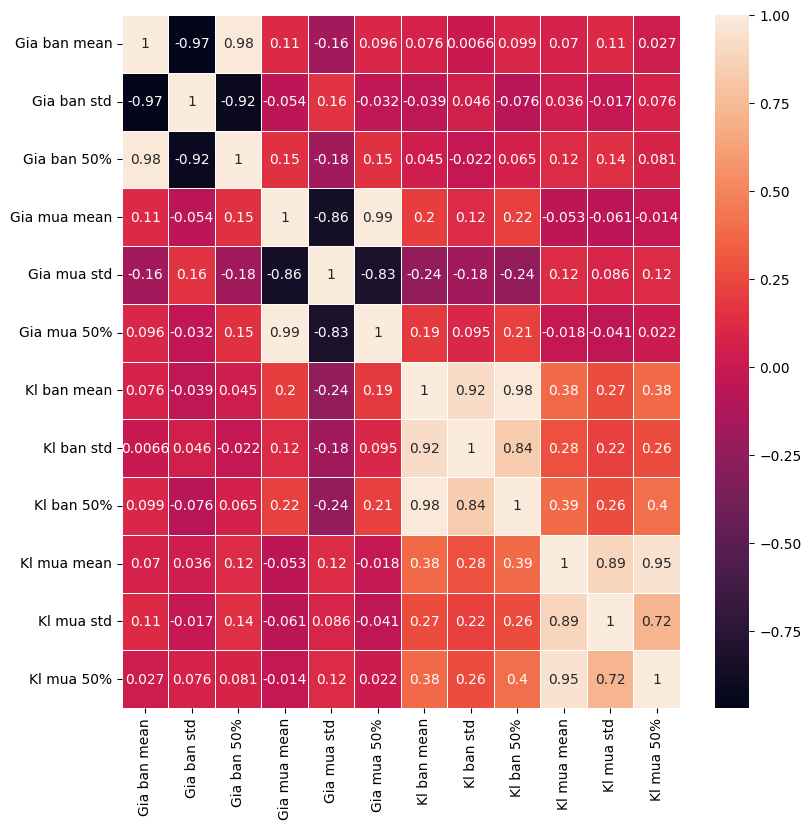

In [ ]:
corr = compare_df.corr()
import matplotlib as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax);

**Từ heatmap ta có nhận xét:**
<br> Xét *giá bán cổ phiếu*:
<br> $\text{corr(mean, standard deviation) of selling price} = -0.97$
<br> $\text{corr(mean, median) of selling price} = 0.98$
<br> tương quan mean và std âm, chứng tỏ nếu trung bình của cổ phiếu X nào đó càng cao thì có rất ít sự phân tán (theo thời gian) của cổ phiếu đó
<br> -Các nhóm feature còn lại là *Giá mua* và *Khối lượng giao dịch* cũng có $\text{|corr|}$ khá gần với 1 , thể hiện ở các ma trận con (3,3) trên đường chéo chính
<br> -Hầu như giữa giá mua, giá bán và khối lượng giao dịch có rất ít sự tương quan

## Bước 4: PCA

### Thêm thư viện

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

###  Chọn số lượng principle components

Với k là số components, n là số chiều của covariance(X), λ là eigen value của Covariance(X)
<br>
***Công thức:*** $\text{explained variance(k)} = \dfrac{\sum\limits_{i=1}^{k} \lambda_{i}}{\sum\limits_{i=1}^{n}\lambda_{i}}$
<br> Đây là cơ sở để chọn số lượng PCs

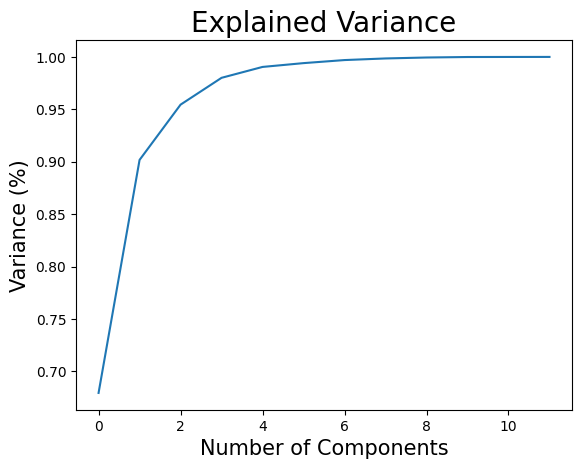

In [ ]:
pca = PCA().fit(compare_df)

# Vẽ đồ thị tổng tích luỹ của phương sai
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15)
plt.title('Explained Variance', fontsize = 20)

plt.show()

###Train và trực quan dữ liệu sau khi PCA

 Từ đồ thị trên, ta sẽ chọn **k = 3** vì explain_variance(3) $\approx$ 0.95, và ngoài ra có thể trực quan được

In [ ]:
# Train
pca = PCA(n_components=3).fit(compare_df)
pca_dataset = pca.transform(compare_df)

# Lưu trữ dữ liệu thu được trong dataframe mới
pca_dataset= pd.DataFrame(data = pca_dataset, index = compare_df.index)
pca_dataset

,0,1,2
ACB,-0.202866,-0.073692,0.078938
BCM,0.525157,-0.132954,-0.006779
BID,-0.158693,-0.064605,-0.034801
BVH,0.577739,-0.154158,0.028119
CTG,-0.080283,-0.085102,-0.055213


Trên đây là dữ liệu sau khi áp dụng PCA, mỗi hàng giờ chỉ còn 3 cột, số chiều ma trận từ (30,12) giảm còn (30,3)

Trực quan hóa sau khi áp dụng PCA

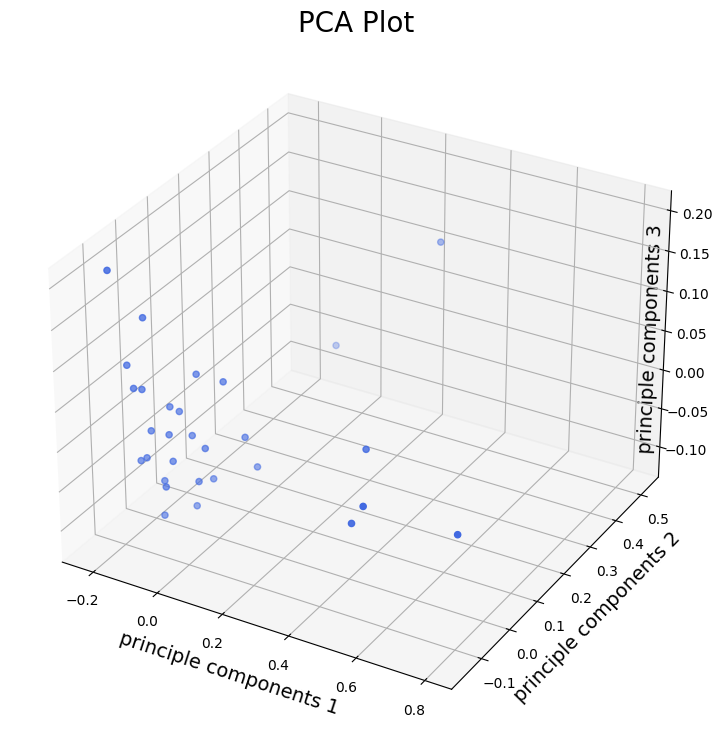

In [ ]:
fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection ='3d')
x = list(pca_dataset.iloc[:,0])
y = list(pca_dataset.iloc[:,1])
z = list(pca_dataset.iloc[:,2])
ax.scatter(x, y, z, c='royalBlue', marker='o')

ax.set_title('PCA Plot', fontdict={'fontsize': 20})
ax.set_xlabel('principle components 1', fontdict={'fontsize': 14})
ax.set_ylabel('principle components 2', fontdict={'fontsize': 14})
ax.set_zlabel('principle components 3', fontdict={'fontsize': 14}, labelpad=-27)
fig.show()

###Feature importance

Ta có kết quả sau: Với mỗi principle component (eigen vector) của Covariance(X), thành phần nào càng lớn thể hiện sự ảnh hưởng của feature đó

In [ ]:
pd.set_option('display.expand_frame_repr', False)

def print_dataframe(data):
    # covariance
    cov = np.cov(data.T)
    # eigen decompose
    eigvals, eigvecs = np.linalg.eig(cov)

    idx = np.argsort(eigvals)[::-1]
    eigvecs = abs(eigvecs[:, idx])
    df = pd.DataFrame(eigvecs.T[:3], columns=data.columns)
    print(df)

data = print_dataframe(compare_df)
data

   Gia ban mean  Gia ban std  Gia ban 50%  Gia mua mean  Gia mua std  Gia mua 50%  Kl ban mean  Kl ban std  Kl ban 50%  Kl mua mean  Kl mua std  Kl mua 50%
0      0.064316     0.025412     0.074917      0.681339     0.214235     0.690394     0.037950    0.018244    0.031874     0.004436    0.005745    0.000442
1      0.678044     0.409207     0.599904      0.068121     0.010109     0.079895     0.010849    0.006216    0.013356     0.022554    0.029852    0.007828
2      0.001834     0.053876     0.017662      0.029274     0.012684     0.031795     0.585105    0.464717    0.438612     0.340064    0.262637    0.243808


**Ở trên, 3 hàng tương ứng là 3 PCs với các thành phần  tương ứng thể hiện ảnh hưởng của feature đó với PC <br> Dễ thấy PC1 bị ảnh hưởng bởi Giá mua, PC2 bị ảnh hưởng bởi Giá bán, PC3 bị ảnh hưởng bởi Khối lượng giao dịch**

## Bước 5: K Means

#### Thêm thư viện

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Chọn số lượng clusters

Metric sử dụng ở đây là Silhouette score
<br>lưu ý là điều kiện để áp dụng silhouette score: $2 \leq \text{number of clusters} \leq \text{number of data points}$
<br> Với điểm $x_i$ đã được cluster:
$$S(i) = \frac{b_i-a_i}{max\{a_i, b_i\}}⇒-1 \leq S(i) \leq 1$$
Trong đó:
<br> $a_i$ là trung bình khoảng cách từ $x_i$ đến các điểm còn lại trong cluster đó
<br> $b_i$ là trung bình khoảng cách từ $x_i$ đến mọi điểm không thuộc cluster đó
<br>Sau khi đã có $S(i), ∀i$ thì lấy trung bình $\bar{S_i}$ để có silhouette score cho cả model, kết quả này càng gần 1 thì model càng có kết quả tốt


In [ ]:
# Bỏ qua warnings cho dễ nhìn
import warnings
warnings.filterwarnings('ignore')
# Cho k chạy từ 2->9
num_of_clusters = 10
k_means_score = pd.DataFrame(columns = range(2,num_of_clusters), index = ['sil_score'])

for k in range(2, num_of_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    k_means_score[k] = sil_score
k_means_score

,2,3,4,5,6,7,8,9
sil_score,0.70375,0.716007,0.447338,0.375316,0.337898,0.313863,0.319326,0.299923


**Từ bảng trên, ta quyết định chọn số cluster là 3**

### Train và trực quan model

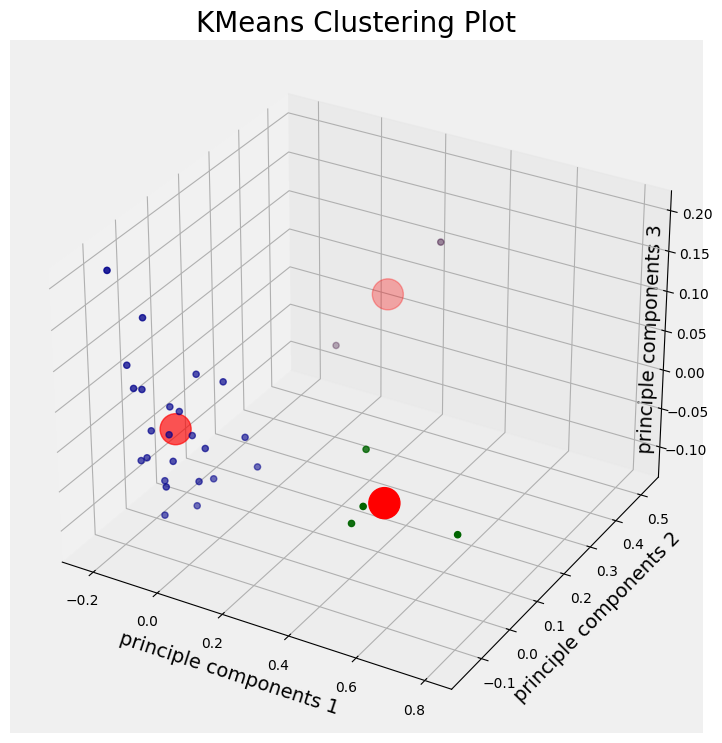

In [ ]:
#train
kmeans = KMeans(n_clusters= 3, random_state=100).fit(pca_dataset)

# Xác định các centroid
cluster_centers = kmeans.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]
C3 = cluster_centers[:, 2]

# Đồ thị 3D
fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection ='3d')

x = list(pca_dataset.iloc[:,0])
y = list(pca_dataset.iloc[:,1])
z = list(pca_dataset.iloc[:,2])

cmap = plt.cm.colors.ListedColormap(['#300030', '#00008b', '#006400'])
ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap=cmap)
ax.scatter(C1, C2, C3, color = 'red', s=500)

ax.set_facecolor('#f0f0f0')
ax.set_xlabel('principle components 1', fontdict={'fontsize': 14})
ax.set_ylabel('principle components 2', fontdict={'fontsize': 14})
ax.set_zlabel('principle components 3', fontdict={'fontsize': 14}, labelpad=-27)
ax.set_title('KMeans Clustering Plot', fontdict={'fontsize': 20})

plt.show()

###Kết quả sau khi clustering

In [ ]:
cluster_value = kmeans.predict(pca_dataset)
result = pd.DataFrame({ "Cổ phiếu": compare_df.index, "Nhóm" : cluster_value.transpose() + 1}).sort_values(by = ['Nhóm'], axis = 0)
k = result.groupby("Nhóm").count()
k.rename(columns = {'Cổ phiếu': 'Số lượng cổ phiếu'}, inplace=True)
array_data = []
for x in range(0,4):
    array_data.append(result[result["Nhóm"] == x]["Cổ phiếu"].tolist())
k["Các cổ phiếu"] = pd.Series(array_data)
print(k)

      Số lượng cổ phiếu                                       Các cổ phiếu
Nhóm                                                                      
1                     2                                         [HDB, SAB]
2                    24  [ACB, VNM, VJC, VIB, VHM, VCB, TPB, TCB, STB, ...
3                     4                               [BVH, VIC, BCM, PDR]


#III. Nhận xét

Vì KMeans là thuật toán Unsupervised, kết quả trên cho ta biết được những cổ phiếu chung nhóm dường như có chung pattern nào đó

# IV. Tài liệu tham khảo

 1. [Clustering Stocks with Python](https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/k-means/Clustering%20Stocks%20-%20KMeans.ipynb?fbclid=IwAR07zYQPZQOPCPqbGI-ZDDzSprMMxqXU8avTY-cka9RMsDPLmRiyV2bI8PI)


 2. [Cách đọc bảng giá chứng khoán điện tử](https://stockinsight.hsc.com.vn/cach-xem-bang-gia-chung-khoan-dien-tu/?fbclid=IwAR35ecTD4JTEX1p5gRYkOLyXf0l8ZxkXmGH-vhCjcrv9E-8E2ls-dQcwHmE)



3. [Stock Market Analytics with PCA](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e)


  